In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
data = pd.read_csv('Market_Basket_Optimisation.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [168]:
data.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

In [169]:
transactions = data.values.reshape(-1).tolist()
transactions

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil',
 'burgers',
 'meatballs',
 'eggs',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'chutney',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'turkey',
 'avocado',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'mineral water',
 'milk',
 'energy bar',
 'whole wheat rice',
 'green tea',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'low fat yogurt',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '

In [170]:
data_list = pd.DataFrame(transactions)
data_list

,0
0,shrimp
1,almonds
2,avocado
3,vegetables mix
4,green grapes
...,...
150015,NaN
150016,NaN
150017,NaN
150018,NaN


In [171]:
data_list['Count'] = 1
data_list['Count']

0         1
1         1
2         1
3         1
4         1
         ..
150015    1
150016    1
150017    1
150018    1
150019    1
Name: Count, Length: 150020, dtype: int64

In [172]:
cnt=0
for i in data_list[0]:
    if i == 'burgers':
        cnt=cnt+1
cnt

654

In [173]:
# Grouping items and rename columns
data_list = data_list.groupby(by=[0], as_index=False).count().sort_values(by=['Count'],ascending=True)
data_list

,0,Count
0,asparagus,1
112,water spray,3
77,napkins,5
34,cream,7
11,bramble,14
...,...,...
25,chocolate,1230
43,french fries,1282
100,spaghetti,1306
37,eggs,1348


In [174]:
data_list['Percentage'] = (data_list['Count']/data_list['Count'].sum())
data_list['Percentage']

0      0.000034
112    0.000102
77     0.000170
34     0.000238
11     0.000477
         ...   
25     0.041889
43     0.043660
100    0.044478
37     0.045908
72     0.060893
Name: Percentage, Length: 120, dtype: float64

In [175]:
data_list = data_list.rename(columns = {0:'Item'})
data_list

,Item,Count,Percentage
0,asparagus,1,0.000034
112,water spray,3,0.000102
77,napkins,5,0.000170
34,cream,7,0.000238
11,bramble,14,0.000477
...,...,...,...
25,chocolate,1230,0.041889
43,french fries,1282,0.043660
100,spaghetti,1306,0.044478
37,eggs,1348,0.045908


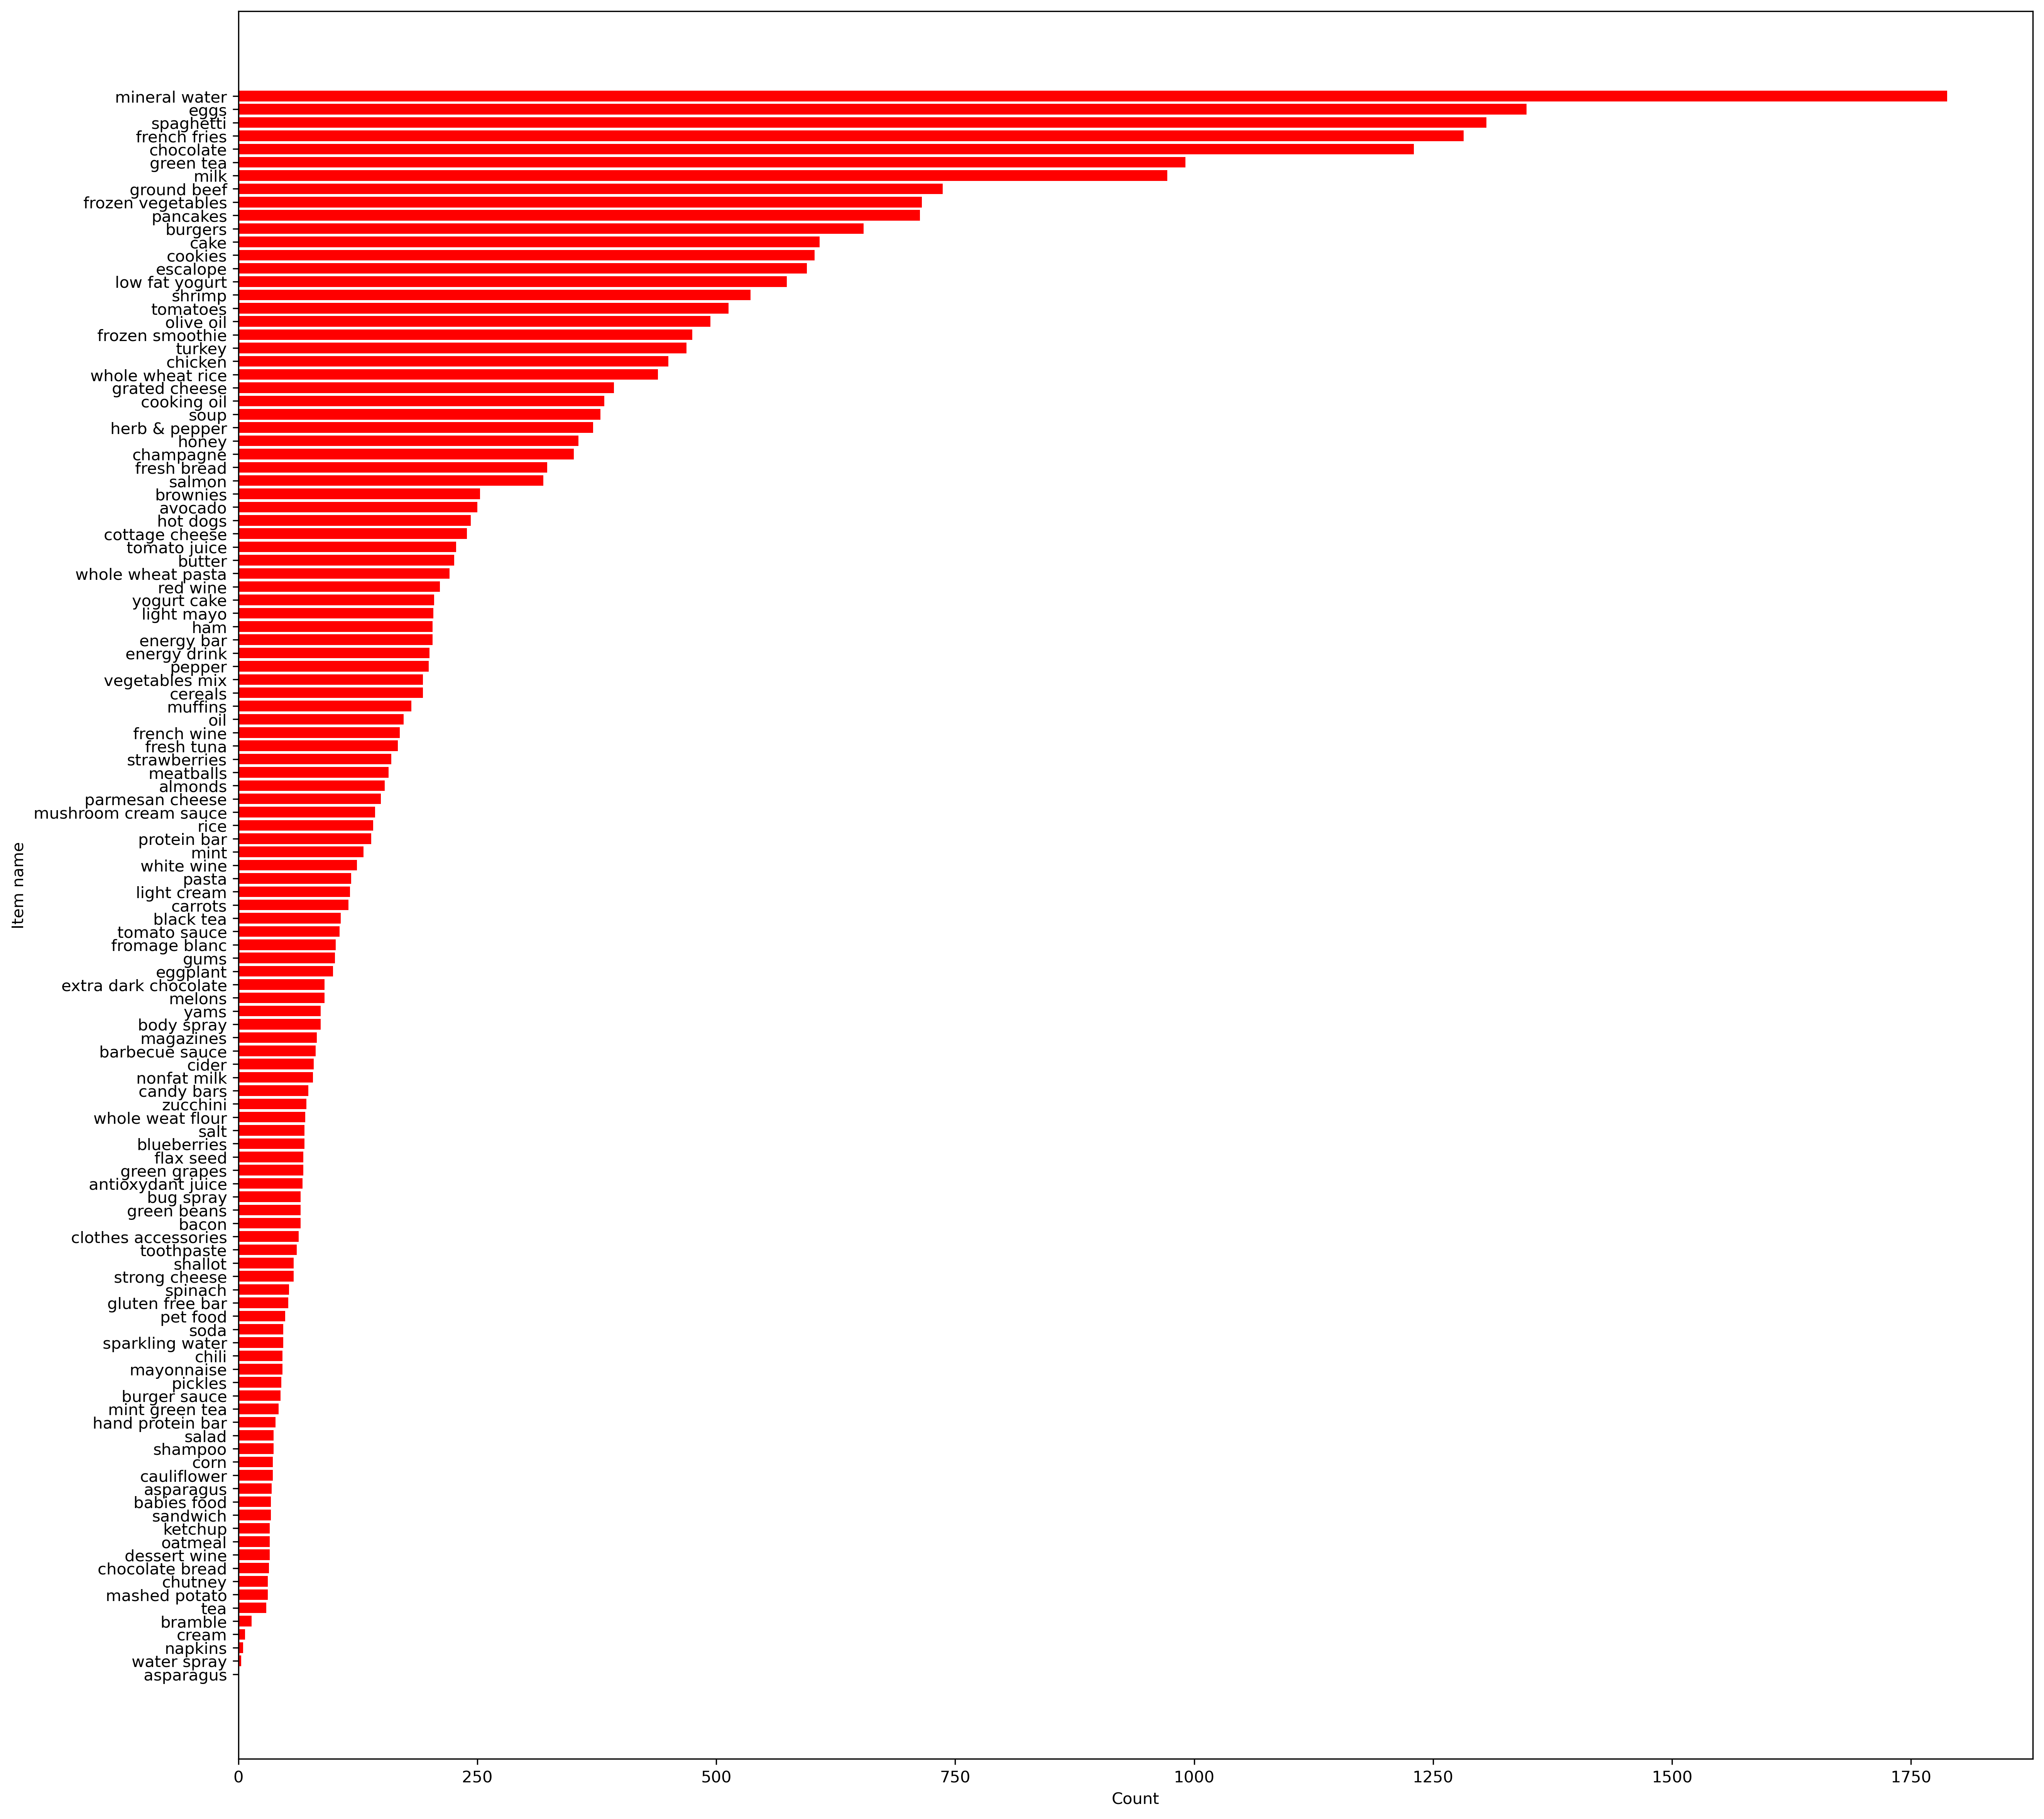

In [176]:
# frequency graph
plt.figure(dpi = 300, figsize=(20,20))
plt.barh(data_list['Item'] ,data_list['Count'],color='red')
#plt.xticks(rotation=90)
plt.xlabel('Count')
plt.ylabel('Item name')

plt.show()

In [177]:
# creating list of lists
transactions2 = data.stack().groupby(level=0).apply(list).tolist()
transactions2

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [178]:
!pip install efficient_apriori

In [179]:
from efficient_apriori import apriori

In [180]:
itemsets, rules = apriori(transactions2, min_support = 0.03, min_confidence = 0.2, verbosity=1)

Generating itemsets.
 Counting itemsets of length 1.
  Found 120 candidate itemsets of length 1.
  Found 36 large itemsets of length 1.
 Counting itemsets of length 2.
  Found 630 candidate itemsets of length 2.
  Found 18 large itemsets of length 2.
 Counting itemsets of length 3.
  Found 14 candidate itemsets of length 3.
Itemset generation terminated.

Generating rules from itemsets.
 Generating rules of size 2.
Rule generation terminated.



In [181]:
itemsets

{1: {('shrimp',): 536,
  ('avocado',): 250,
  ('cottage cheese',): 239,
  ('tomato juice',): 228,
  ('low fat yogurt',): 574,
  ('green tea',): 991,
  ('honey',): 356,
  ('mineral water',): 1788,
  ('salmon',): 319,
  ('frozen smoothie',): 475,
  ('olive oil',): 494,
  ('burgers',): 654,
  ('eggs',): 1348,
  ('turkey',): 469,
  ('milk',): 972,
  ('whole wheat rice',): 439,
  ('french fries',): 1282,
  ('soup',): 379,
  ('frozen vegetables',): 715,
  ('spaghetti',): 1306,
  ('cookies',): 603,
  ('cooking oil',): 383,
  ('champagne',): 351,
  ('chocolate',): 1229,
  ('chicken',): 450,
  ('tomatoes',): 513,
  ('pancakes',): 713,
  ('grated cheese',): 393,
  ('fresh bread',): 323,
  ('ground beef',): 737,
  ('escalope',): 595,
  ('herb & pepper',): 371,
  ('cake',): 608,
  ('hot dogs',): 243,
  ('brownies',): 253,
  ('butter',): 226},
 2: {('chocolate', 'eggs'): 249,
  ('chocolate', 'french fries'): 258,
  ('chocolate', 'milk'): 241,
  ('chocolate', 'mineral water'): 395,
  ('chocolate', '

In [182]:
rules

[{chocolate} -> {eggs},
 {french fries} -> {chocolate},
 {chocolate} -> {french fries},
 {milk} -> {chocolate},
 {mineral water} -> {chocolate},
 {chocolate} -> {mineral water},
 {spaghetti} -> {chocolate},
 {chocolate} -> {spaghetti},
 {french fries} -> {eggs},
 {eggs} -> {french fries},
 {milk} -> {eggs},
 {mineral water} -> {eggs},
 {eggs} -> {mineral water},
 {spaghetti} -> {eggs},
 {eggs} -> {spaghetti},
 {frozen vegetables} -> {mineral water},
 {green tea} -> {mineral water},
 {ground beef} -> {mineral water},
 {spaghetti} -> {ground beef},
 {ground beef} -> {spaghetti},
 {mineral water} -> {milk},
 {milk} -> {mineral water},
 {spaghetti} -> {milk},
 {milk} -> {spaghetti},
 {pancakes} -> {mineral water},
 {spaghetti} -> {mineral water},
 {mineral water} -> {spaghetti}]

In [183]:
for item in sorted(rules, key=lambda item: (item.lift,item.conviction), reverse=True):
    print(item)

{ground beef} -> {spaghetti} (conf: 0.399, supp: 0.039, lift: 2.291, conv: 1.374)
{spaghetti} -> {ground beef} (conf: 0.225, supp: 0.039, lift: 2.291, conv: 1.164)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.305)
{frozen vegetables} -> {mineral water} (conf: 0.375, supp: 0.036, lift: 1.572, conv: 1.218)
{milk} -> {spaghetti} (conf: 0.274, supp: 0.035, lift: 1.572, conv: 1.137)
{spaghetti} -> {milk} (conf: 0.204, supp: 0.035, lift: 1.572, conv: 1.093)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)
{mineral water} -> {milk} (conf: 0.201, supp: 0.048, lift: 1.554, conv: 1.090)
{milk} -> {chocolate} (conf: 0.248, supp: 0.032, lift: 1.513, conv: 1.112)
{pancakes} -> {mineral water} (conf: 0.355, supp: 0.034, lift: 1.489, conv: 1.181)
{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.439, conv: 1.159)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.439, conv: 1.102)
{chocolate} -> {spaghett

In [184]:
for item in sorted(rules, key=lambda item: (item.support,item.conviction), reverse=True):
    print(item)

{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.439, conv: 1.159)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.439, conv: 1.102)
{chocolate} -> {mineral water} (conf: 0.321, supp: 0.053, lift: 1.348, conv: 1.122)
{mineral water} -> {chocolate} (conf: 0.221, supp: 0.053, lift: 1.348, conv: 1.073)
{eggs} -> {mineral water} (conf: 0.283, supp: 0.051, lift: 1.189, conv: 1.063)
{mineral water} -> {eggs} (conf: 0.214, supp: 0.051, lift: 1.189, conv: 1.043)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)
{mineral water} -> {milk} (conf: 0.201, supp: 0.048, lift: 1.554, conv: 1.090)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.305)
{ground beef} -> {spaghetti} (conf: 0.399, supp: 0.039, lift: 2.291, conv: 1.374)
{spaghetti} -> {ground beef} (conf: 0.225, supp: 0.039, lift: 2.291, conv: 1.164)
{chocolate} -> {spaghetti} (conf: 0.239, supp: 0.039, lift: 1.374, conv: 1.086)
{spaghetti} -> {ch

In [185]:
for item in sorted(rules, key=lambda item: (item.confidence,item.conviction), reverse=True):
    print(item)

{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.305)
{ground beef} -> {spaghetti} (conf: 0.399, supp: 0.039, lift: 2.291, conv: 1.374)
{frozen vegetables} -> {mineral water} (conf: 0.375, supp: 0.036, lift: 1.572, conv: 1.218)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)
{pancakes} -> {mineral water} (conf: 0.355, supp: 0.034, lift: 1.489, conv: 1.181)
{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.439, conv: 1.159)
{chocolate} -> {mineral water} (conf: 0.321, supp: 0.053, lift: 1.348, conv: 1.122)
{eggs} -> {mineral water} (conf: 0.283, supp: 0.051, lift: 1.189, conv: 1.063)
{milk} -> {spaghetti} (conf: 0.274, supp: 0.035, lift: 1.572, conv: 1.137)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.439, conv: 1.102)
{milk} -> {chocolate} (conf: 0.248, supp: 0.032, lift: 1.513, conv: 1.112)
{chocolate} -> {spaghetti} (conf: 0.239, supp: 0.039, lift: 1.374, conv: 1.086)
{milk} -> {eggs} 

In [197]:
cof = [i for i in item.confidence]
cof

TypeError: 'float' object is not iterable

In [ ]:
tabular_data = pd.DataFrame(rules)
tabular_data['confidence'] = cof
tabular_data['support'] = item.support
tabular_data['lift'] = item.lift
tabular_data